In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('IMDb Movies India.csv', encoding= 'unicode_escape')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [148]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
display(report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.shape

(15509, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
df.drop_duplicates(inplace=True) # to check for any  duplicates
df.shape

(15503, 10)

In [9]:
df.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

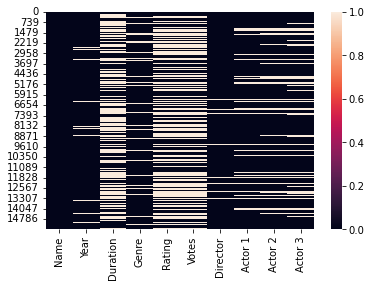

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
df.dropna(inplace=True)
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [29]:
df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [30]:
df.shape

(5659, 10)

In [34]:
genre=df['Genre']
genre.head(5)

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [27]:
df["Year"].head()

1    2019
3    2019
5    1997
6    2005
8    2012
Name: Year, dtype: int64

In [35]:
genres=df['Genre'].str.split(',',expand=True)
genres.head(5)

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [38]:
directors = df["Director"].value_counts()
directors.head(5)

David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Name: Director, dtype: int64

In [37]:
df["Director"].nunique()

2431

In [39]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(5)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
dtype: int64

In [55]:
import plotly.express as px
from wordcloud import WordCloud

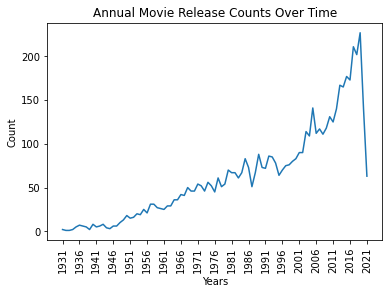

In [50]:
ax = sns.lineplot(data=df['Year'].value_counts().sort_index())
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.show()

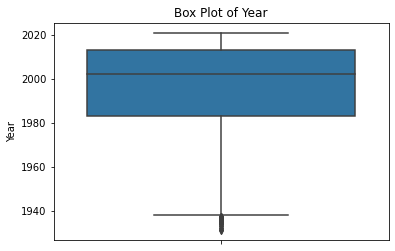

In [51]:
ax = sns.boxplot(data=df, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

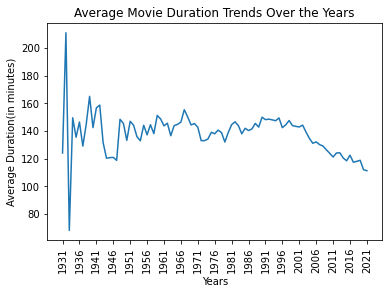

In [52]:
ax = sns.lineplot(data=df.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
tick_positions = range(min(df['Year']), max(df['Year']) + 1, 5)
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_positions, rotation = 90)
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [53]:
Q1 = df['Duration'].quantile(0.25)
Q3 = df['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Duration'] >= lower_bound) & (df['Duration'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


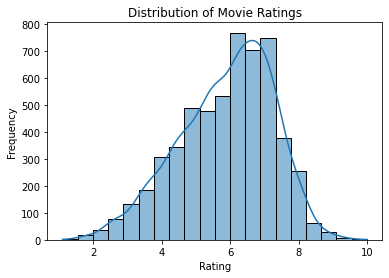

In [87]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()


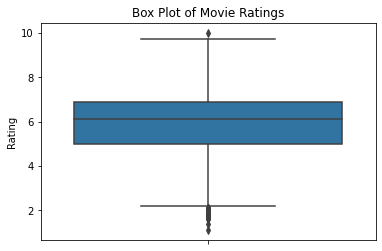

In [88]:
ax = sns.boxplot(data=df, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')
plt.show()

In [89]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


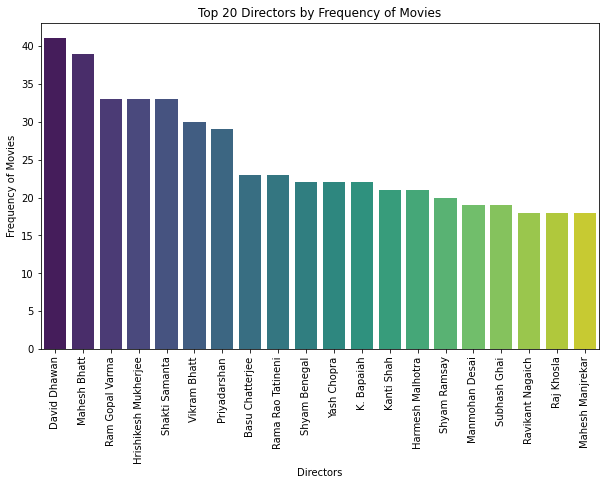

In [91]:
mpl.figure(figsize=(10, 6))
ax = sns.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

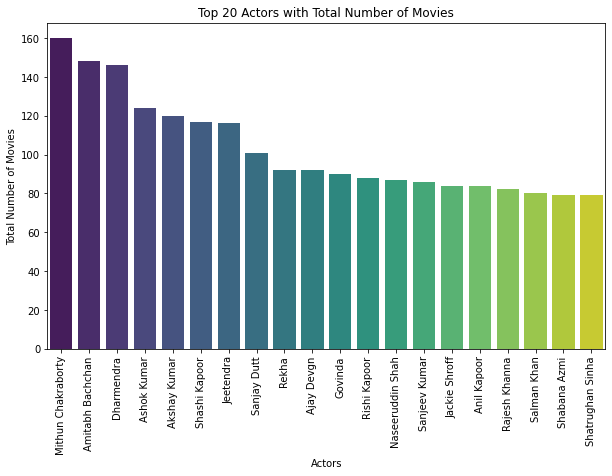

In [93]:
mpl.figure(figsize=(10, 6))
ax = sns.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

In [94]:
#spliting the data

In [95]:
from sklearn.model_selection import train_test_split

In [98]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output = df['Rating']

In [99]:
Input.head(5)

,Year,Duration,Votes
1,2019,109,8
3,2019,110,35
5,1997,147,827
6,2005,142,"1,086"
8,2012,82,326


In [100]:
Output.head(5)

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [123]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
